In [2]:
!pip install pywaffle
from pywaffle import Waffle

In [3]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from termcolor import colored

import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline
init_notebook_mode(connected= True)

In [4]:
df=pd.read_csv("Employee.csv")
df.head(10).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [5]:
#The shape of the dataset.....
print(colored(df.shape,'blue'))

(4653, 9)


In [6]:
#The dimensions of the dataset.......
print(colored((df.ndim),'green'))

2


In [7]:
#The size of the dataset.......
print(colored((df.size),'green'))

41877


In [8]:
#The columns we have in the dataset.....
print(colored(df.columns,'green'))

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


In [9]:
#The dtypes we have in the dataset.....
print(colored(df.dtypes,'green'))

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [10]:
#The Information of the Dataset
print(colored(df.info(),'green'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


In [12]:
# statistics on numerical data......
round(df.describe(exclude = 'object'), 2).style.set_properties(**{"background-color":
                            "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.060000,2.700000,29.390000,2.910000,0.340000
std,1.860000,0.560000,4.830000,1.560000,0.480000
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [14]:
# statistics on categorical data
round(df.describe(exclude = ['float', 'int64']),2).style.set_properties(**{"background-color": 
                                    "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


<AxesSubplot:>

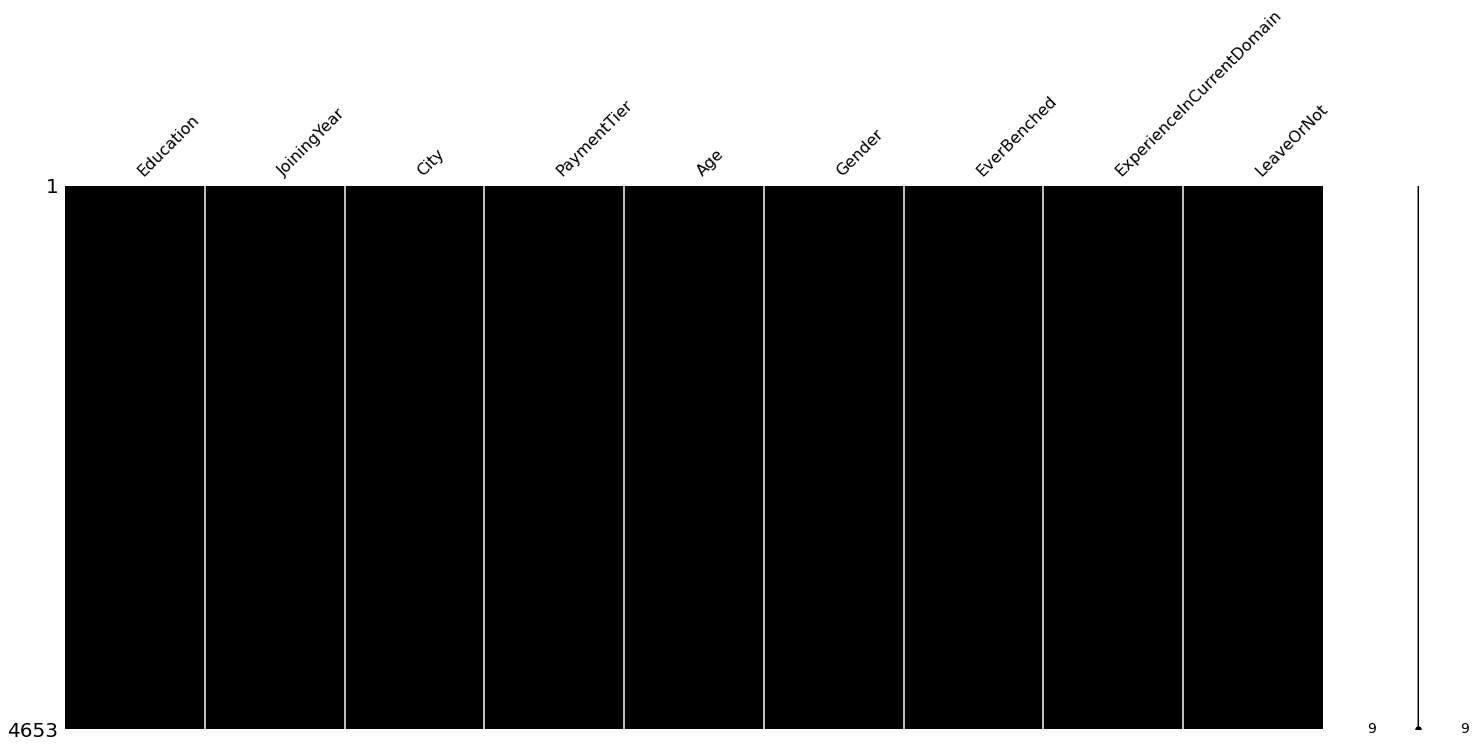

In [18]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [19]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,Total,Percentage
Education,0,0.000000
JoiningYear,0,0.000000
City,0,0.000000
PaymentTier,0,0.000000
Age,0,0.000000
Gender,0,0.000000
EverBenched,0,0.000000
ExperienceInCurrentDomain,0,0.000000
LeaveOrNot,0,0.000000


In [20]:
print(colored(df[df.duplicated()].shape,'green'))

(1889, 9)


In [21]:
df.drop_duplicates(inplace=True); 

In [22]:
print(colored(df.shape,'green'))

(2764, 9)


In [23]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print(colored("The length of the categorical feature is ",'green'))
print(colored(len(categorical_features),'green'))

The length of the categorical feature is 
4


In [24]:
print(colored(categorical_features,'green'))

['Education', 'City', 'Gender', 'EverBenched']


Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64




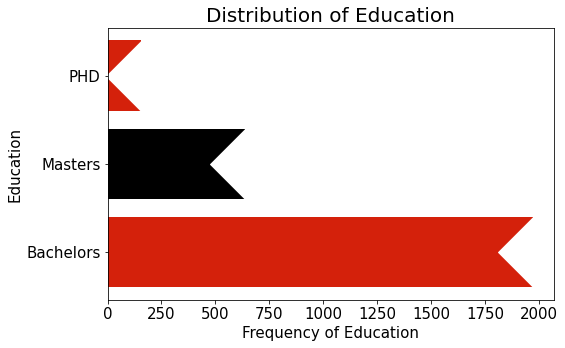

In [25]:
print(colored(df["Education"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the Education.....
b = df["Education"].value_counts()
d = pd.DataFrame({'Education':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.Education, "D", color='white', markersize=50)
ax.barh(sort_df.Education, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of Education",fontsize = 15)
plt.ylabel("Education",fontsize = 15)
plt.title("Distribution of Education",fontsize = 20);

Male      1529
Female    1235
Name: Gender, dtype: int64




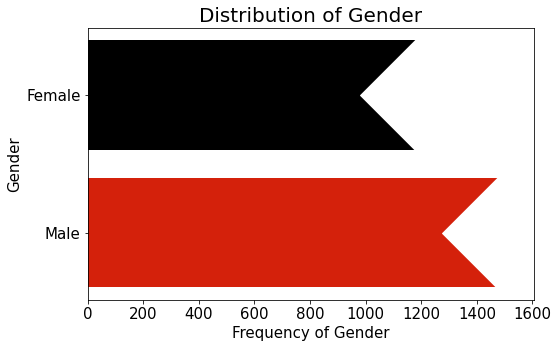

In [26]:
print(colored(df["Gender"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the gender.....
b = df["Gender"].value_counts()
d = pd.DataFrame({'Gender':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.Gender, "D", color='white', markersize=100)
ax.barh(sort_df.Gender, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of Gender",fontsize = 15)
plt.ylabel("Gender",fontsize = 15)
plt.title("Distribution of Gender",fontsize = 20);

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64




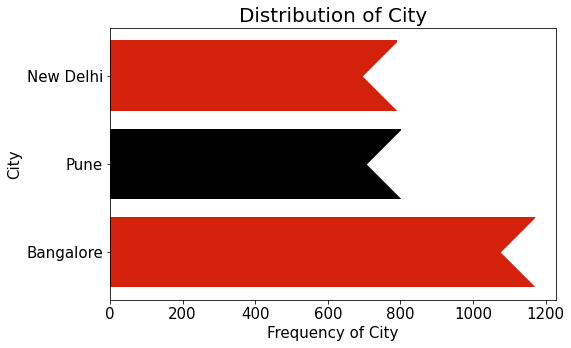

In [27]:
print(colored(df["City"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the City.....
b = df["City"].value_counts()
d = pd.DataFrame({'City':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.City, "D", color='white', markersize=48)
ax.barh(sort_df.City, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of City",fontsize = 15)
plt.ylabel("City",fontsize = 15)
plt.title("Distribution of City",fontsize = 20);

No     2403
Yes     361
Name: EverBenched, dtype: int64




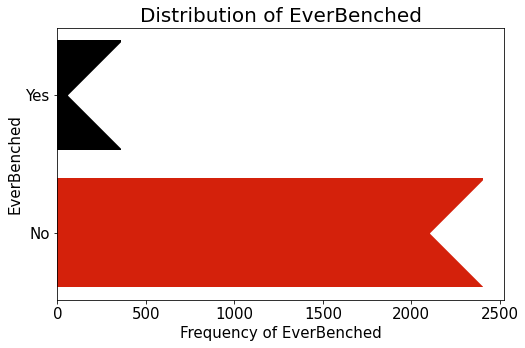

In [28]:
print(colored(df["EverBenched"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the EverBenched.....
b = df["EverBenched"].value_counts()
d = pd.DataFrame({'EverBenched':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.EverBenched, "D", color='white', markersize=75)
ax.barh(sort_df.EverBenched, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of EverBenched",fontsize = 15)
plt.ylabel("EverBenched",fontsize = 15)
plt.title("Distribution of EverBenched",fontsize = 20);

In [31]:
Discrete_features=[feature for feature in df.columns if df[feature].dtypes=='int64']
print(colored("The length of the discrete feature is ",'green'))
print(colored(len(Discrete_features),'green'))

The length of the discrete feature is 
5


In [32]:
print(colored(Discrete_features,'green'))

['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']


3    1976
2     570
1     218
Name: PaymentTier, dtype: int64




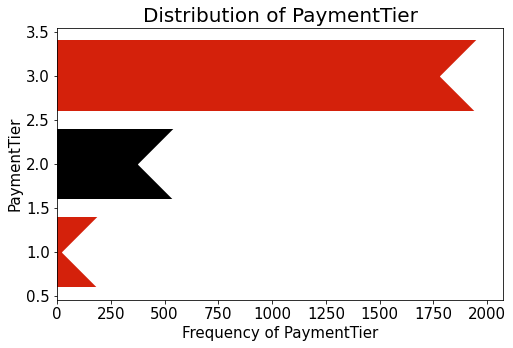

In [33]:
print(colored(df["PaymentTier"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the gender.....
b = df["PaymentTier"].value_counts()
d = pd.DataFrame({'PaymentTier':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.PaymentTier, "D", color='white', markersize=60)
ax.barh(sort_df.PaymentTier, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of PaymentTier",fontsize = 15)
plt.ylabel("PaymentTier",fontsize = 15)
plt.title("Distribution of PaymentTier",fontsize = 20);

2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: ExperienceInCurrentDomain, dtype: int64




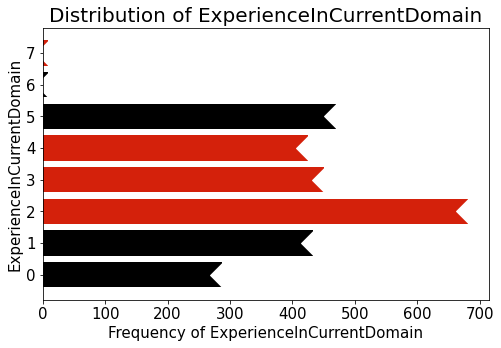

In [34]:
print(colored(df["ExperienceInCurrentDomain"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the ExperienceInCurrentDomain.....
b = df["ExperienceInCurrentDomain"].value_counts()
d = pd.DataFrame({'ExperienceInCurrentDomain':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.ExperienceInCurrentDomain, "D", color='white', markersize=17)
ax.barh(sort_df.ExperienceInCurrentDomain, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of ExperienceInCurrentDomain",fontsize = 15)
plt.ylabel("ExperienceInCurrentDomain",fontsize = 15)
plt.title("Distribution of ExperienceInCurrentDomain",fontsize = 20);

0    1676
1    1088
Name: LeaveOrNot, dtype: int64




(-0.5, 1.5)

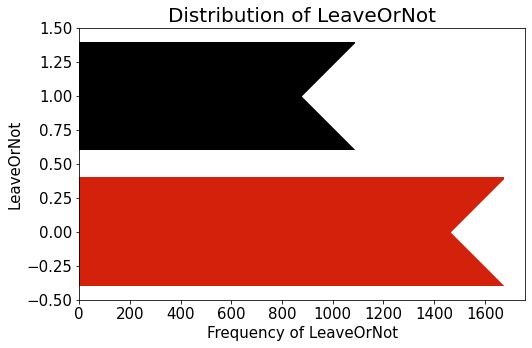

In [35]:
print(colored(df["LeaveOrNot"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the LeaveOrNot.....
b = df["LeaveOrNot"].value_counts()
d = pd.DataFrame({'LeaveOrNot':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.LeaveOrNot, "D", color='white', markersize=75)
ax.barh(sort_df.LeaveOrNot, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of LeaveOrNot",fontsize = 15)
plt.ylabel("LeaveOrNot",fontsize = 15)
plt.title("Distribution of LeaveOrNot",fontsize = 20);
plt.ylim(-0.5,1.5)

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64




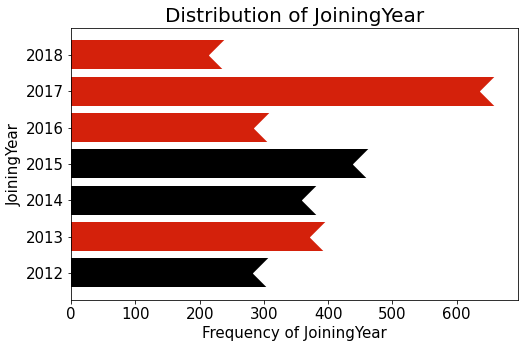

In [36]:
print(colored(df["JoiningYear"].value_counts(),'green'))
print('\n')

#Lets check the distribution of the JoiningYear....
b = df["JoiningYear"].value_counts()
d = pd.DataFrame({'JoiningYear':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.JoiningYear, "D", color='white', markersize=22)
ax.barh(sort_df.JoiningYear, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of JoiningYear",fontsize = 15)
plt.ylabel("JoiningYear",fontsize = 15)
plt.title("Distribution of JoiningYear",fontsize = 20);

22     31
23     41
41     75
35    110
32    113
33    114
31    115
39    115
38    117
34    118
37    119
40    119
36    121
24    161
25    167
26    179
29    180
30    186
27    218
28    365
Name: Age, dtype: int64




(21.0, 43.0)

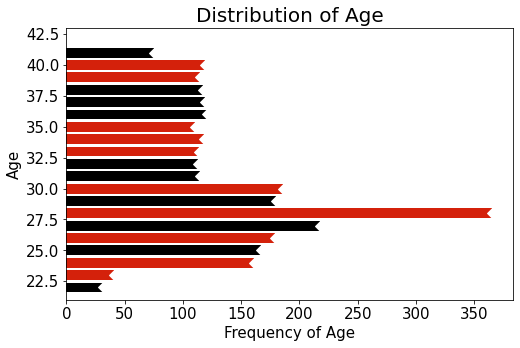

In [37]:
print(colored(df["Age"].value_counts().sort_values(ascending = True),'green'))
print('\n')

#Lets check the distribution of the Age....
b = df["Age"].value_counts()
d = pd.DataFrame({'Age':b.index, 'Statistics':b.values})
sort_df = d.sort_values(by='Statistics', ascending=False)
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d4210b','#000000']
ax.plot(sort_df.Statistics, d.Age, "D", color='white', markersize=7)
ax.barh(sort_df.Age, width=sort_df.Statistics, color=colors)
plt.xlabel("Frequency of Age",fontsize = 15)
plt.ylabel("Age",fontsize = 15)
plt.title("Distribution of Age",fontsize = 20);
ax.set_ylim(bottom=21, top=43,emit=True)

In [38]:
pd.crosstab(df['Education'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
Education,,,
Bachelors,1232,739,1971
Masters,328,309,637
PHD,116,40,156
All,1676,1088,2764


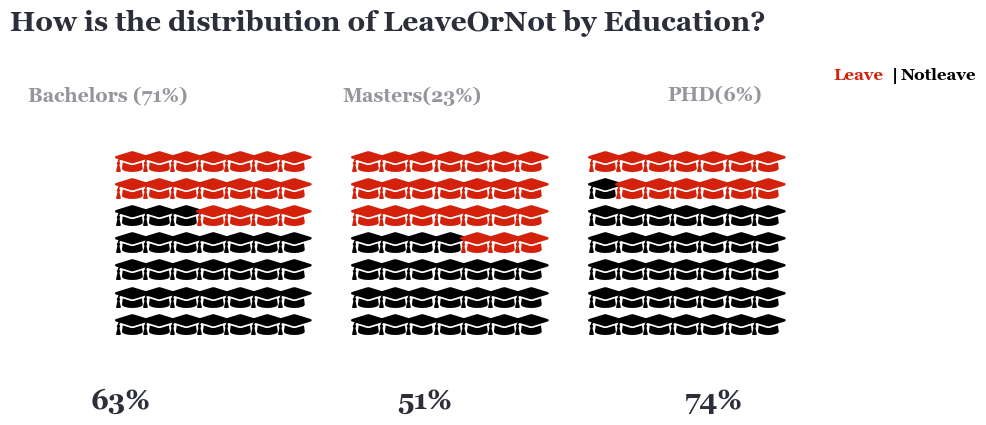

In [39]:
leave_gen = df[df['LeaveOrNot'] == 1]['Education'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['Education'].value_counts()

bachelors = df['Education'].value_counts().values[0]
masters =  df['Education'].value_counts().values[1]
phd =  df['Education'].value_counts().values[2]

leave_bachelors = int(round (leave_gen.values[0] / bachelors * 100, 0))
leave_masters = int(round( leave_gen.values[1] / masters *100, 0))
leave_phd = int(round (leave_gen.values[2] /phd * 100, 0))
notleave_bachelors = int(round(notleave_gen.values[0] / bachelors * 100, 0))
notleave_masters = int(round(notleave_gen.values[1] / masters *100, 0))
notleave_phd = int(round(notleave_gen.values[2] / phd *100, 0))

bachelors_per = int(round(bachelors/(bachelors+masters+phd) * 100, 0))
masters_per = int(round(masters/(bachelors+masters+phd)* 100, 0))
phd_per = int(round(phd/(bachelors+masters+phd)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (9,7),
                 facecolor = '#ffffff',dpi = 100,
                 
                 plots = {'131':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_bachelors,leave_bachelors],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'graduation-cap',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '132' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_masters,leave_masters],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'graduation-cap',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                          
                           '133' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_phd,leave_phd],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'graduation-cap',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },}
                )


fig.text(0.03, 0.8, 'How is the distribution of LeaveOrNot by Education?', {'font':'Georgia', 'size':20, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.12, 0.26, '{}%'.format(notleave_bachelors), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.46, 0.26, '{}%'.format(notleave_masters), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.78, 0.26, '{}%'.format(notleave_phd), {'font':'Georgia', 'size':20,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.05, 0.7, 'Bachelors ({}%)'.format(bachelors_per), {'font':'Georgia', 'size':14,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.40, 0.7, 'Masters({}%)'.format(masters_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.76, 0.7, 'PHD({}%)'.format(phd_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.945,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(1.01,0.73, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
fig.text(1.02,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()

In [40]:
pd.crosstab(df['City'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
City,,,
Bangalore,761,410,1171
New Delhi,522,270,792
Pune,393,408,801
All,1676,1088,2764


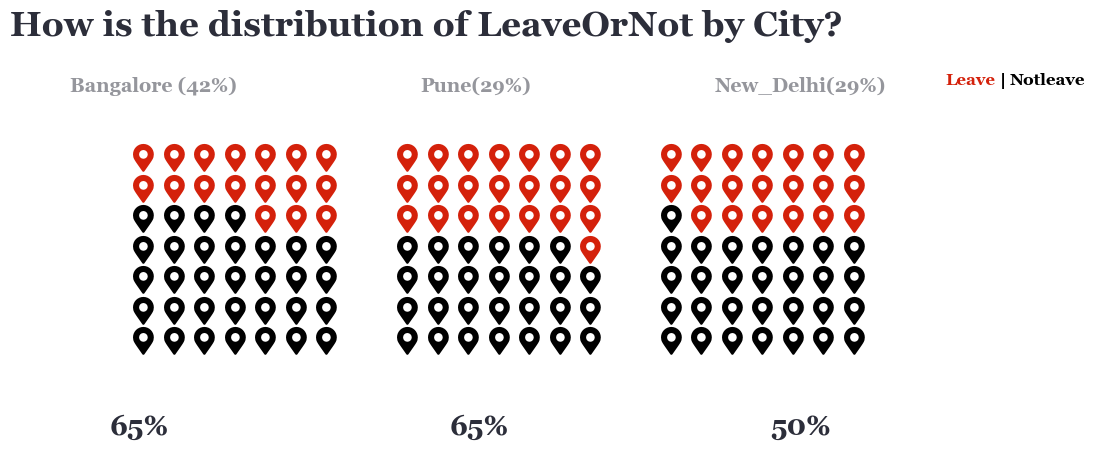

In [41]:
leave_gen = df[df['LeaveOrNot'] == 1]['City'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['City'].value_counts()

bangalore = df['City'].value_counts().values[0]
pune =  df['City'].value_counts().values[1]
newdelhi =  df['City'].value_counts().values[2]

leave_bangalore = int(round (leave_gen.values[0] / bangalore * 100, 0))
leave_pune = int(round( leave_gen.values[1] / pune *100, 0))
leave_newdelhi = int(round (leave_gen.values[2] /newdelhi * 100, 0))

notleave_bangalore = int(round(notleave_gen.values[0] / bangalore * 100, 0))
notleave_pune = int(round(notleave_gen.values[1] / pune *100, 0))
notleave_newdelhi = int(round(notleave_gen.values[2] / newdelhi *100, 0))

bangalore_per = int(round(bangalore/(bangalore+pune+newdelhi)* 100, 0))
pune_per = int(round(pune/(bangalore+pune+newdelhi)* 100, 0))
newdelhi_per = int(round(newdelhi/(bangalore+pune+newdelhi)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (10,7),
                 facecolor = '#ffffff',dpi = 100,
                 
                 plots = {'131':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_bangalore,leave_bangalore],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'map-marker-alt',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '132' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_pune,leave_pune],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'map-marker-alt',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                          
                           '133' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_newdelhi,leave_newdelhi],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'map-marker-alt',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },}
)


fig.text(0.02, 0.8, 'How is the distribution of LeaveOrNot by City?', {'font':'Georgia', 'size':25, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.12, 0.23, '{}%'.format(notleave_bangalore), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.46, 0.23, '{}%'.format(notleave_pune), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.78, 0.23, '{}%'.format(notleave_newdelhi), {'font':'Georgia', 'size':20,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.08, 0.72, 'Bangalore ({}%)'.format(bangalore_per), {'font':'Georgia', 'size':14,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.43, 0.72, 'Pune({}%)'.format(pune_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.725, 0.72, 'New_Delhi({}%)'.format(newdelhi_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.955,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(1.01,0.73, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
fig.text(1.02,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()


In [42]:
pd.crosstab(df['Gender'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
Gender,,,
Female,621,614,1235
Male,1055,474,1529
All,1676,1088,2764


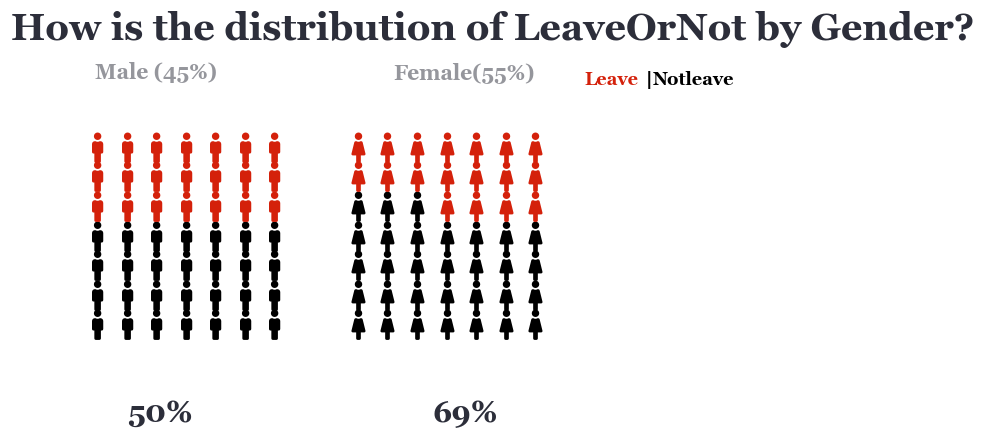

In [43]:
leave_gen = df[df['LeaveOrNot'] == 1]['Gender'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['Gender'].value_counts()

female = df['Gender'].value_counts().values[0]
male =  df['Gender'].value_counts().values[1]

leave_female = int(round (leave_gen.values[0] / female * 100, 0))
leave_male = int(round( leave_gen.values[1] / male *100, 0))
notleave_female = int(round(notleave_gen.values[0] / female * 100, 0))
notleave_male = int(round(notleave_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (6,6),
                 facecolor = '#ffffff',dpi = 108,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_male,leave_male],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_female,leave_female],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0.03, 0.8, 'How is the distribution of LeaveOrNot by Gender?', {'font':'Georgia', 'size':25, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.21, 0.21, '{}%'.format(notleave_male), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.68, 0.21, '{}%'.format(notleave_female), {'font':'Georgia', 'size':20,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.16, 0.74, 'Male ({}%)'.format(male_per), {'font':'Georgia', 'size':14,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.62, 0.74, 'Female({}%)'.format(female_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.915,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(1.01,0.73, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
fig.text(1.02,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()

In [44]:
pd.crosstab(df['EverBenched'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
EverBenched,,,
No,1474,929,2403
Yes,202,159,361
All,1676,1088,2764


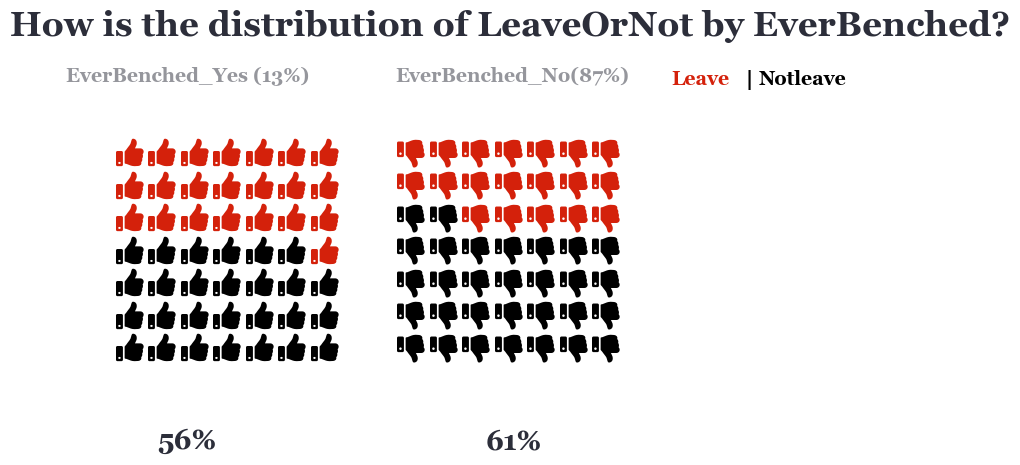

In [45]:
leave_gen = df[df['LeaveOrNot'] == 1]['EverBenched'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['EverBenched'].value_counts()

no = df['EverBenched'].value_counts().values[0]
yes =  df['EverBenched'].value_counts().values[1]

leave_no = int(round (leave_gen.values[0] / no * 100, 0))
leave_yes = int(round( leave_gen.values[1] / yes *100, 0))
notleave_no = int(round(notleave_gen.values[0] / no * 100, 0))
notleave_yes = int(round(notleave_gen.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#ffffff',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_yes,leave_yes],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'thumbs-up',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_no,leave_no],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'thumbs-down',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'How is the distribution of LeaveOrNot by EverBenched?', {'font':'Georgia', 'size':25, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.21, 0.21, '{}%'.format(notleave_yes), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.68, 0.21, '{}%'.format(notleave_no), {'font':'Georgia', 'size':20,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.08, 0.735, 'EverBenched_Yes ({}%)'.format(yes_per), {'font':'Georgia', 'size':14,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.55, 0.735, 'EverBenched_No({}%)'.format(no_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.945,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '14','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(1.05,0.73, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
fig.text(1.07,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '14','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()

In [46]:
pd.crosstab(df['Age'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
Age,,,
22,17,14,31
23,28,13,41
24,80,81,161
25,79,88,167
26,85,94,179
27,116,102,218
28,224,141,365
29,116,64,180
30,112,74,186


In [47]:
pd.crosstab(df['JoiningYear'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
JoiningYear,,,
2012,225,83,308
2013,225,171,396
2014,266,119,385
2015,272,192,464
2016,222,88,310
2017,461,201,662
2018,5,234,239
All,1676,1088,2764


In [48]:
df['JoiningYear'].value_counts().values[6]

239

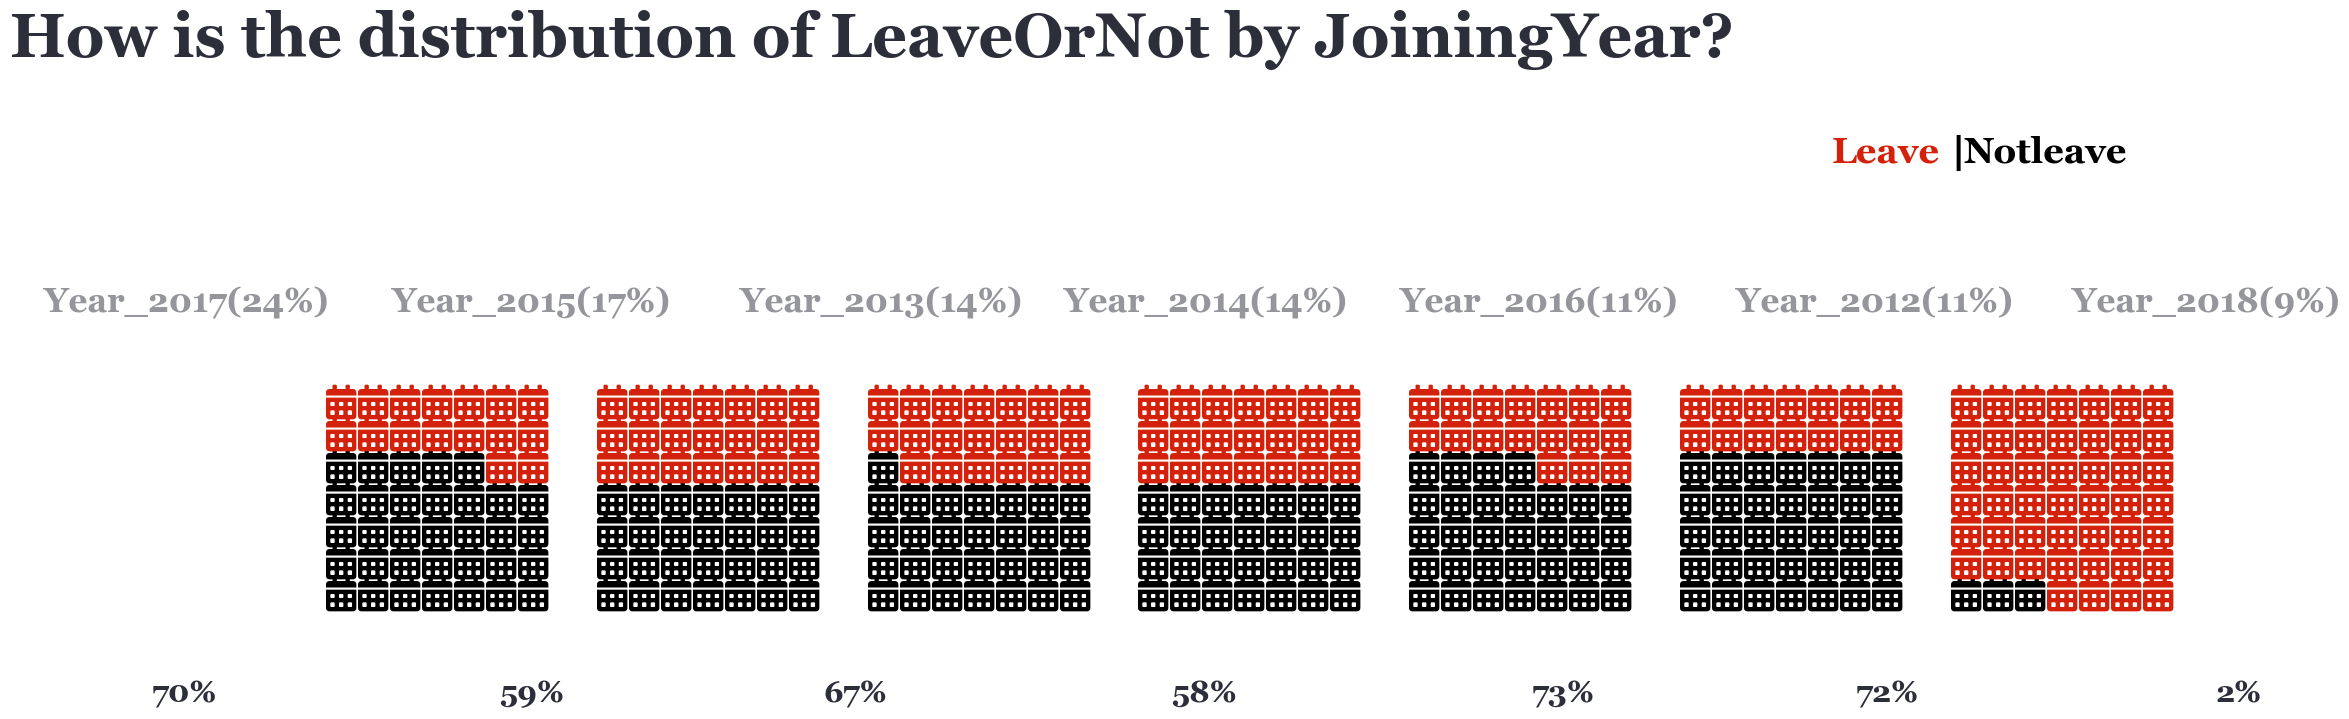

In [49]:
leave_gen = df[df['LeaveOrNot'] == 1]['JoiningYear'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['JoiningYear'].value_counts()

Year_2017 = df['JoiningYear'].value_counts().values[0]
Year_2015 =  df['JoiningYear'].value_counts().values[1]
Year_2013 =  df['JoiningYear'].value_counts().values[2]
Year_2014 = df['JoiningYear'].value_counts().values[3]
Year_2016 =  df['JoiningYear'].value_counts().values[4]
Year_2012 =  df['JoiningYear'].value_counts().values[5]
Year_2018 = df['JoiningYear'].value_counts().values[6]

leave_Year_2017 = int(round(leave_gen.values[0] / Year_2017 * 100, 0))
leave_Year_2015 = int(round(leave_gen.values[1] / Year_2015 *100, 0))
leave_Year_2013 = int(round(leave_gen.values[2] /Year_2013 * 100, 0))
leave_Year_2014 = int(round(leave_gen.values[3] / Year_2014 * 100, 0))
leave_Year_2016 = int(round(leave_gen.values[4] / Year_2016 *100, 0))
leave_Year_2012 = int(round(leave_gen.values[5] /Year_2012 * 100, 0))
leave_Year_2018 = int(round(leave_gen.values[6] / Year_2018 * 100, 0))

notleave_Year_2017 = int(round (notleave_gen.values[0] / Year_2017 * 100, 0))
notleave_Year_2015 = int(round( notleave_gen.values[1] / Year_2015 *100, 0))
notleave_Year_2013 = int(round (notleave_gen.values[2] / Year_2013 * 100, 0))
notleave_Year_2014 = int(round (notleave_gen.values[3] / Year_2014 * 100, 0))
notleave_Year_2016 = int(round( notleave_gen.values[4] / Year_2016 *100, 0))
notleave_Year_2012 = int(round (notleave_gen.values[5] / Year_2012 * 100, 0))
notleave_Year_2018 = int(round (notleave_gen.values[6] / Year_2018 * 100, 0))

Year_2017_per = int(round(Year_2017/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018) * 100, 0))
Year_2015_per = int(round(Year_2015/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018)* 100, 0))
Year_2013_per = int(round(Year_2013/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018)* 100, 0))
Year_2014_per = int(round(Year_2014/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018) * 100, 0))
Year_2016_per = int(round(Year_2016/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018)* 100, 0))
Year_2012_per = int(round(Year_2012/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018)* 100, 0))
Year_2018_per = int(round(Year_2018/(Year_2017+Year_2015+Year_2013+Year_2014+Year_2016+Year_2012+Year_2018) * 100, 0))


fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (24,15),
                 facecolor = '#ffffff',dpi = 100,
                 
                 plots = {'171':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_Year_2017,leave_Year_2017],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend': False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '172' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Year_2015,leave_Year_2015],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                          
                           '173' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Year_2013,leave_Year_2013],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                            '174' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Year_2014,leave_Year_2014],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                         '175' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Year_2016,leave_Year_2016],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },              
                          '176' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Year_2012,leave_Year_2012],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                         '177' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Year_2018,leave_Year_2018],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 3.95,
                              'interval_ratio_x': 3.95,
                              'icons' : 'calendar-alt',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                         
                        }
)


fig.text(0.001, 0.8, 'How is the distribution of LeaveOrNot by JoiningYear?', {'font':'Georgia', 'size':44, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.06, 0.37, '{}%'.format(notleave_Year_2017), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.205, 0.37, '{}%'.format(notleave_Year_2015), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.34, 0.37, '{}%'.format(notleave_Year_2013), {'font':'Georgia', 'size':22,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.485, 0.37, '{}%'.format(notleave_Year_2014), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.635, 0.37, '{}%'.format(notleave_Year_2016), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.77, 0.37, '{}%'.format(notleave_Year_2012), {'font':'Georgia', 'size':22,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.92, 0.37, '{}%'.format(notleave_Year_2018), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)

fig.text(0.015, 0.63, 'Year_2017({}%)'.format(Year_2017_per), {'font':'Georgia', 'size':24,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.16, 0.63, 'Year_2015({}%)'.format(Year_2015_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.305, 0.63, 'Year_2013({}%)'.format(Year_2013_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.44, 0.63, 'Year_2014({}%)'.format(Year_2014_per), {'font':'Georgia', 'size':24,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.58, 0.63, 'Year_2016({}%)'.format(Year_2016_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.72, 0.63, 'Year_2012({}%)'.format(Year_2012_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.86, 0.63, 'Year_2018({}%)'.format(Year_2018_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)

fig.text(0.76,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '26','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(0.81,0.73, '|', {'color':'black' , 'size':'26', 'weight': 'bold'})
fig.text(0.815,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '26','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()


In [50]:
pd.crosstab(df['PaymentTier'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
PaymentTier,,,
1,141,77,218
2,227,343,570
3,1308,668,1976
All,1676,1088,2764


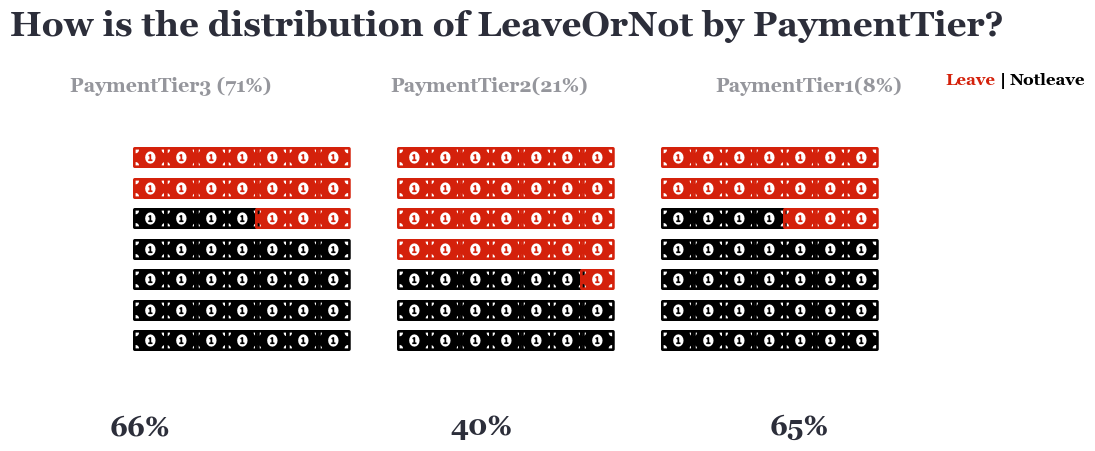

In [51]:
leave_gen = df[df['LeaveOrNot'] == 1]['PaymentTier'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['PaymentTier'].value_counts()

PaymentTier_3 = df['PaymentTier'].value_counts().values[0]
PaymentTier_2 =  df['PaymentTier'].value_counts().values[1]
PaymentTier_1 =  df['PaymentTier'].value_counts().values[2]

leave_PaymentTier_3 = int(round (leave_gen.values[0] / PaymentTier_3 * 100, 0))
leave_PaymentTier_2 = int(round( leave_gen.values[1] / PaymentTier_2 *100, 0))
leave_PaymentTier_1 = int(round (leave_gen.values[2] /PaymentTier_1 * 100, 0))
notleave_PaymentTier_3 = int(round(notleave_gen.values[0] / PaymentTier_3 * 100, 0))
notleave_PaymentTier_2 = int(round(notleave_gen.values[1] / PaymentTier_2 *100, 0))
notleave_PaymentTier_1 = int(round(notleave_gen.values[2] / PaymentTier_1 *100, 0))

PaymentTier3_per = int(round(PaymentTier_3/(PaymentTier_3+PaymentTier_2+PaymentTier_1) * 100, 0))
PaymentTier2_per = int(round(PaymentTier_2/(PaymentTier_3+PaymentTier_2+PaymentTier_1)* 100, 0))
PaymentTier1_per = int(round(PaymentTier_1/(PaymentTier_3+PaymentTier_2+PaymentTier_1)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (10,7),
                 facecolor = '#ffffff',dpi = 100,
                 
                 plots = {'131':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_PaymentTier_3,leave_PaymentTier_3],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'money-bill-alt',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '132' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_PaymentTier_2,leave_PaymentTier_2],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'money-bill-alt',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                          
                           '133' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_PaymentTier_1,leave_PaymentTier_1],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'money-bill-alt',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },}
)


fig.text(0.02, 0.8, 'How is the distribution of LeaveOrNot by PaymentTier?', {'font':'Georgia', 'size':25, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.12, 0.23, '{}%'.format(notleave_PaymentTier_3), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.46, 0.23, '{}%'.format(notleave_PaymentTier_2), {'font':'Georgia', 'size':20,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.78, 0.23, '{}%'.format(notleave_PaymentTier_1), {'font':'Georgia', 'size':20,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.08, 0.72, 'PaymentTier3 ({}%)'.format(PaymentTier3_per), {'font':'Georgia', 'size':14,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.40, 0.72, 'PaymentTier2({}%)'.format(PaymentTier2_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.725, 0.72, 'PaymentTier1({}%)'.format(PaymentTier1_per), {'font':'Georgia', 'size':14,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.955,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(1.01,0.73, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
fig.text(1.02,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()

In [52]:
pd.crosstab(df['ExperienceInCurrentDomain'],df['LeaveOrNot'],margins=True).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

LeaveOrNot,0,1,All
ExperienceInCurrentDomain,,,
0,178,109,287
1,273,160,433
2,390,291,681
3,255,196,451
4,258,167,425
5,310,160,470
6,6,2,8
7,6,3,9
All,1676,1088,2764


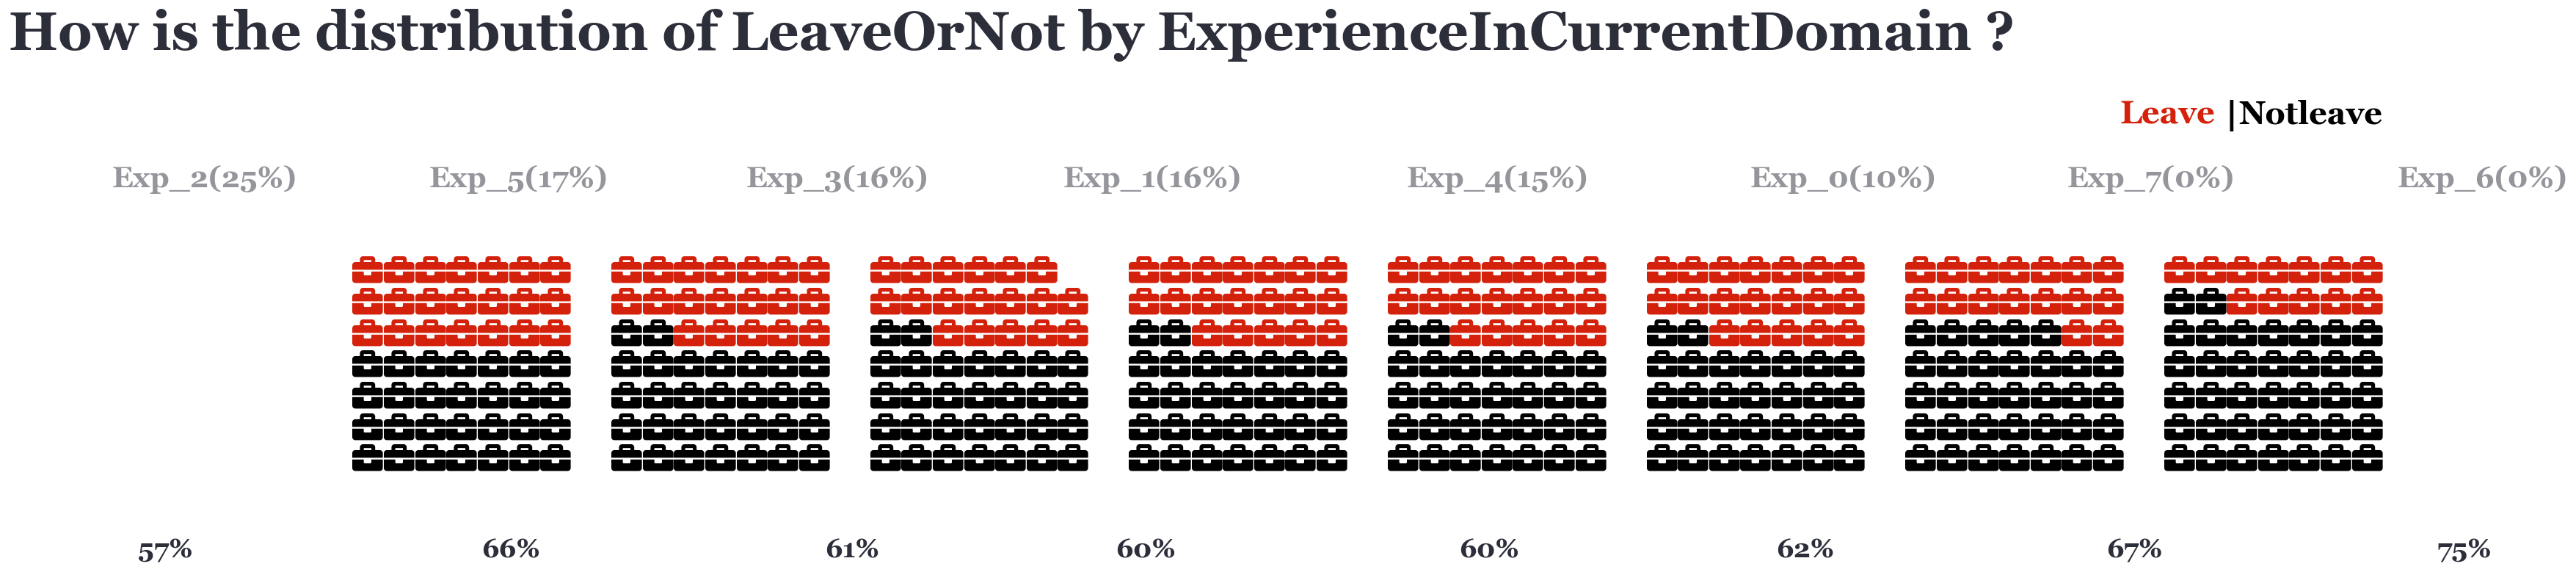

In [53]:
leave_gen = df[df['LeaveOrNot'] == 1]['ExperienceInCurrentDomain'].value_counts()
notleave_gen = df[df['LeaveOrNot'] == 0]['ExperienceInCurrentDomain'].value_counts()

Exp_2 = df['ExperienceInCurrentDomain'].value_counts().values[0]
Exp_5 =  df['ExperienceInCurrentDomain'].value_counts().values[1]
Exp_3 =  df['ExperienceInCurrentDomain'].value_counts().values[2]
Exp_1 = df['ExperienceInCurrentDomain'].value_counts().values[3]
Exp_4 =  df['ExperienceInCurrentDomain'].value_counts().values[4]
Exp_0 =  df['ExperienceInCurrentDomain'].value_counts().values[5]
Exp_7 = df['ExperienceInCurrentDomain'].value_counts().values[6]
Exp_6 =  df['ExperienceInCurrentDomain'].value_counts().values[7]

leave_Exp_2 = int(round(leave_gen.values[0] / Exp_2 * 100, 0))
leave_Exp_5 = int(round(leave_gen.values[1] / Exp_5 *100, 0))
leave_Exp_3 = int(round(leave_gen.values[2] /Exp_3 * 100, 0))
leave_Exp_1 = int(round(leave_gen.values[3] / Exp_1 * 100, 0))
leave_Exp_4 = int(round(leave_gen.values[4] / Exp_4 *100, 0))
leave_Exp_0 = int(round(leave_gen.values[5] /Exp_0 * 100, 0))
leave_Exp_7 = int(round(leave_gen.values[6] / Exp_7 * 100, 0))
leave_Exp_6 = int(round(leave_gen.values[7] / Exp_6 *100, 0))

notleave_Exp_2 = int(round (notleave_gen.values[0] / Exp_2 * 100, 0))
notleave_Exp_5 = int(round( notleave_gen.values[1] / Exp_5 *100, 0))
notleave_Exp_3 = int(round (notleave_gen.values[2] / Exp_3 * 100, 0))
notleave_Exp_1 = int(round (notleave_gen.values[3] / Exp_1 * 100, 0))
notleave_Exp_4 = int(round( notleave_gen.values[4] / Exp_4 *100, 0))
notleave_Exp_0 = int(round (notleave_gen.values[5] / Exp_0 * 100, 0))
notleave_Exp_7 = int(round (notleave_gen.values[6] / Exp_7 * 100, 0))
notleave_Exp_6 = int(round( notleave_gen.values[7] / Exp_6 *100, 0))

Exp_2_per = int(round(Exp_2/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7) * 100, 0))
Exp_5_per = int(round(Exp_5/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7)* 100, 0))
Exp_3_per = int(round(Exp_3/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7)* 100, 0))
Exp_1_per = int(round(Exp_1/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7) * 100, 0))
Exp_4_per = int(round(Exp_4/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7)* 100, 0))
Exp_0_per = int(round(Exp_0/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7)* 100, 0))
Exp_7_per = int(round(Exp_7/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7) * 100, 0))
Exp_6_per = int(round(Exp_6/(Exp_0+Exp_1+Exp_2+Exp_3+Exp_4+Exp_5+Exp_6+Exp_7)* 100, 0))


fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (30,12),
                 facecolor = '#ffffff',dpi = 120,
                 
                 plots = {'181':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [notleave_Exp_2,leave_Exp_2],
                            'colors' : ['#000000','#d4210b'],
                              'vertical' : True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend': False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '182' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_5,leave_Exp_5],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           },
                          
                           '183' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_3,leave_Exp_3],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                            '184' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_1,leave_Exp_1],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                         '185' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_4,leave_Exp_4],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },              
                          '186' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_0,leave_Exp_0],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                       '187' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_7,leave_Exp_7],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                         '188' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[notleave_Exp_6,leave_Exp_6],         
                              'colors' : ['#000000','#d4210b'],
                              'vertical': True,
                              'interval_ratio_y': 0.95,
                              'interval_ratio_x': 0.95,
                              'icons' : 'briefcase',
                              'icon_legend' :False,
                              'icon_size':25,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                          },
                         
                        }
)


fig.text(0.001, 0.8, 'How is the distribution of LeaveOrNot by ExperienceInCurrentDomain ?', {'font':'Georgia', 'size':44, 'color':'#2c2e3a', 'weight':'bold'})
fig.text(0.05, 0.32, '{}%'.format(notleave_Exp_2), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.18, 0.32, '{}%'.format(notleave_Exp_5), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.31, 0.32, '{}%'.format(notleave_Exp_3), {'font':'Georgia', 'size':22,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.42, 0.32, '{}%'.format(notleave_Exp_1), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.55, 0.32, '{}%'.format(notleave_Exp_4), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.67, 0.32, '{}%'.format(notleave_Exp_0), {'font':'Georgia', 'size':22,'weight':'bold', 'color':'#2c2e3a'}, alpha = 1)
fig.text(0.795, 0.32, '{}%'.format(notleave_Exp_7), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)
fig.text(0.92, 0.32, '{}%'.format(notleave_Exp_6), {'font':'Georgia', 'size':22,'weight':'bold' ,'color':'#2c2e3a'},alpha = 1,)


fig.text(0.04, 0.67, 'Exp_2({}%)'.format(Exp_2_per), {'font':'Georgia', 'size':24,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.16, 0.67, 'Exp_5({}%)'.format(Exp_5_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.28, 0.67, 'Exp_3({}%)'.format(Exp_3_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.40, 0.67, 'Exp_1({}%)'.format(Exp_1_per), {'font':'Georgia', 'size':24,'weight':'bold' ,'color':'#2c2e3a'},alpha = 0.5,)
fig.text(0.53, 0.67, 'Exp_4({}%)'.format(Exp_4_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.66, 0.67, 'Exp_0({}%)'.format(Exp_0_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.78, 0.67, 'Exp_7({}%)'.format(Exp_7_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)
fig.text(0.905, 0.67, 'Exp_6({}%)'.format(Exp_6_per), {'font':'Georgia', 'size':24,'weight':'bold', 'color':'#2c2e3a'}, alpha = 0.5)


fig.text(0.80,0.73, 'Leave', {'font': 'Georgia','weight':'bold','Size': '26','weight':'bold','style':'normal', 'color':'#d4210b'})
fig.text(0.84,0.73, '|', {'color':'black' , 'size':'26', 'weight': 'bold'})
fig.text(0.845,0.73, 'Notleave', {'font': 'Georgia','weight':'bold', 'Size': '26','style':'normal', 'weight':'bold','color':'#000000'},alpha = 1)
fig.show()


<AxesSubplot:>

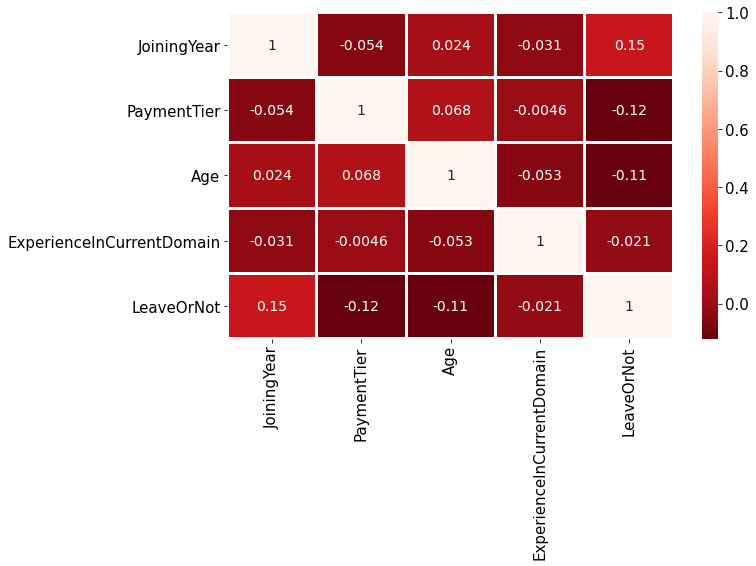

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,cmap = "Reds_r",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":14})

In [58]:
Num_features = df.iloc[:, [1.3,4,7,8]] 
print(colored(type(Num_features),'green'))
print('\n')
print(colored(Num_features.head(),'green'))

<class 'pandas.core.frame.DataFrame'>


   JoiningYear  Age  ExperienceInCurrentDomain  LeaveOrNot
0         2017   34                          0           0
1         2013   28                          3           1
2         2014   38                          2           0
3         2016   27                          5           1
4         2017   24                          2           1


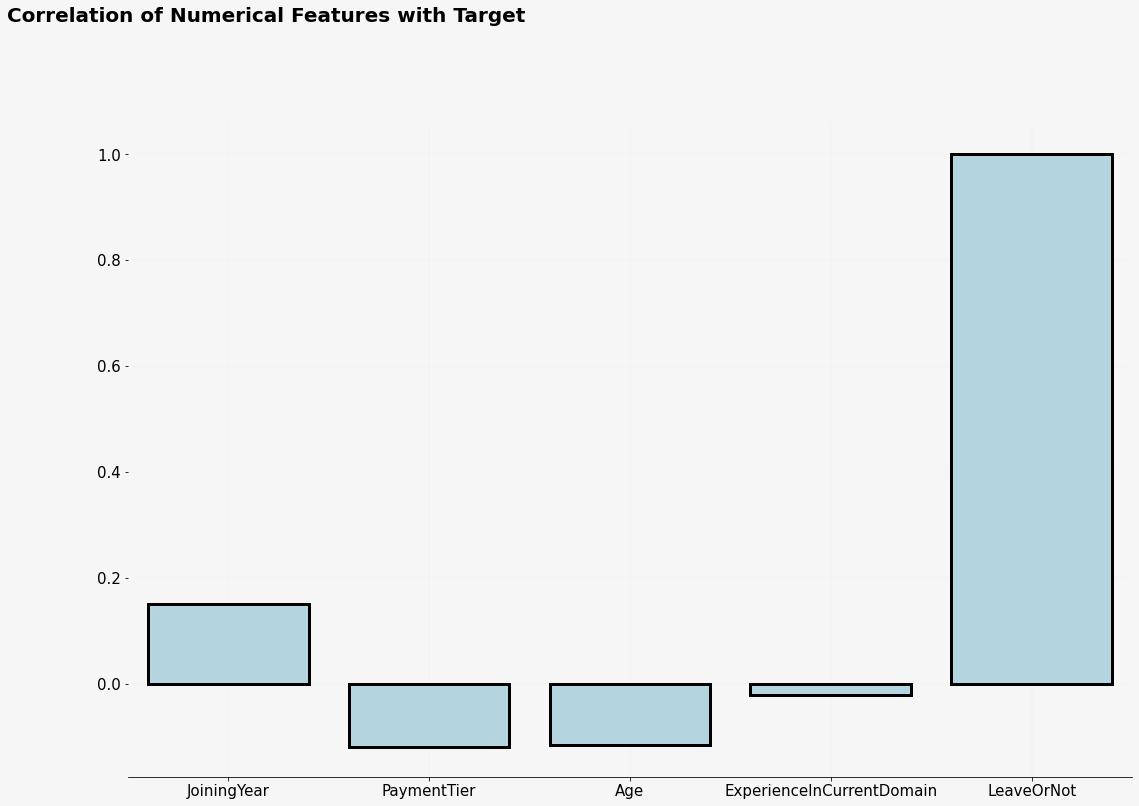

In [61]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(18,12), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['LeaveOrNot']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='lightblue', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [62]:
#The shape of the dataset.....
print(colored(df.shape,'green'))

(2764, 9)


In [63]:
df=pd.get_dummies(data=df,columns=['Education','City','Gender','EverBenched'],drop_first=True)
df.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1


0    1676
1    1088
Name: LeaveOrNot, dtype: int64
(2764, 11)


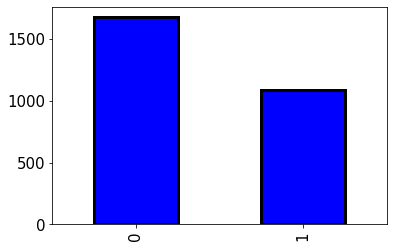

In [69]:
#Original data....
print(colored(df['LeaveOrNot'].value_counts(),'green'))
df['LeaveOrNot'].value_counts().plot(kind = 'bar',color = 'blue',edgecolor = 'black',linewidth=3)
#The shape of the dataset.....
print(colored(df.shape,'blue'))

In [72]:
#SMOTE

0    1676
1    1676
Name: LeaveOrNot, dtype: int64


<AxesSubplot:>

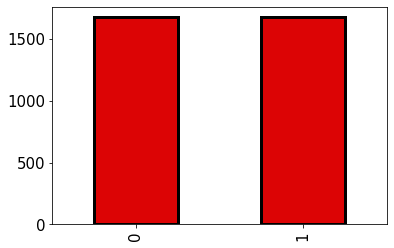

In [70]:
#Using oversampling technique i am trying to balance the dataset...

from sklearn.utils import resample

#Separate majority and minority classes
df_majority = df[df.LeaveOrNot==0]
df_minority = df[df.LeaveOrNot==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1676,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(colored(df_upsampled['LeaveOrNot'].value_counts(),'green'))

#Visualizing the Geography
df_upsampled['LeaveOrNot'].value_counts().plot(kind = 'bar',color = '#dc0405',edgecolor = 'black',linewidth=3)

In [71]:
df_upsampled.head(2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
2,2014,3,38,2,0,0,0,1,0,0,0


In [73]:
#The shape of the dataset.....
print(colored(df_upsampled.shape,'green'))

(3352, 11)


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_upsampled.drop('LeaveOrNot',axis = 1))
scaled_features = scaler.transform(df_upsampled.drop('LeaveOrNot',axis = 1))
df_scaled = pd.DataFrame(scaled_features,columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
        'Education_Masters', 'Education_PHD', 'City_New Delhi',
       'City_Pune', 'Gender_Male', 'EverBenched_Yes'])
df_scaled.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"10pt",'width': 200})

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,0.974680,0.610448,0.634875,-1.655163,-0.557594,-0.224621,-0.608605,-0.668355,0.924667,-0.404832
1,-0.597566,0.610448,1.425477,-0.396233,-0.557594,-0.224621,1.643100,-0.668355,-1.081471,-0.404832
2,0.450598,0.610448,-1.736930,-1.655163,-0.557594,-0.224621,-0.608605,-0.668355,0.924667,-0.404832
3,-0.073484,0.610448,1.425477,-1.655163,-0.557594,-0.224621,1.643100,-0.668355,0.924667,-0.404832
4,0.450598,0.610448,-1.539279,-1.025698,-0.557594,-0.224621,-0.608605,1.496211,0.924667,-0.404832


In [76]:
X = df_scaled
y = df_upsampled['LeaveOrNot']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
!pip install xgboost

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [84]:

# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))



cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'DecisionTreeClassifier']})

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.722098        0.025996  RandomForestClassifier
1              0.769828        0.017194     Logistic Regression
2              0.817553        0.020040      AdaBoostClassifier
3              0.645366        0.020100       Gradient Boosting
4              0.780894        0.020974  DecisionTreeClassifier


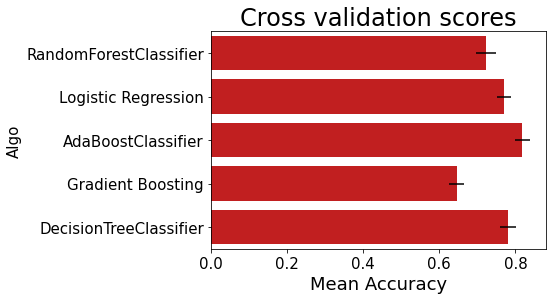

<Figure size 864x576 with 0 Axes>

In [85]:
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#dc0405')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(colored(cv_df,"green"))

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [87]:
print(colored(confusion_matrix(y_test, y_pred),'green'))

[[372 154]
 [ 92 388]]


In [88]:
print(colored(classification_report(y_test, y_pred),'green'))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       526
           1       0.72      0.81      0.76       480

    accuracy                           0.76      1006
   macro avg       0.76      0.76      0.76      1006
weighted avg       0.76      0.76      0.76      1006



In [89]:
print(colored(accuracy_score(y_test, y_pred),"green"))

0.7554671968190855


In [90]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [92]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test) 
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [93]:
print(colored(accuracy_score(y_test, y_pred),'green'))

0.7833001988071571


In [94]:
# best parameters and best score

print(colored(grid_search.best_params_,"green"))
print(colored(grid_search.best_score_,'green'))

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4}
0.7779285941115093


In [95]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=3,
                                                                                min_samples_split=4)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [96]:
print(colored(grid_search.best_params_,"green"))
print(colored(grid_search.best_score_,"green"))

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 90}
0.8201309328968904


In [97]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 180)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=3,
                                                         min_samples_split=4),
                   learning_rate=1, n_estimators=180)

In [98]:
print(colored(confusion_matrix(y_test, y_pred),"green"))

[[439  87]
 [131 349]]


In [99]:
print(colored(classification_report(y_test, y_pred),'green'))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       526
           1       0.80      0.73      0.76       480

    accuracy                           0.78      1006
   macro avg       0.79      0.78      0.78      1006
weighted avg       0.78      0.78      0.78      1006



In [100]:
print(colored(accuracy_score(y_test, y_pred),'green'))

0.7833001988071571


In [101]:
feature = pd.Series(ada.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Age                          0.264835
JoiningYear                  0.188953
ExperienceInCurrentDomain    0.150757
PaymentTier                  0.088851
Gender_Male                  0.082820
Education_Masters            0.062853
City_Pune                    0.061298
City_New Delhi               0.044084
EverBenched_Yes              0.038833
Education_PHD                0.016714
dtype: float64


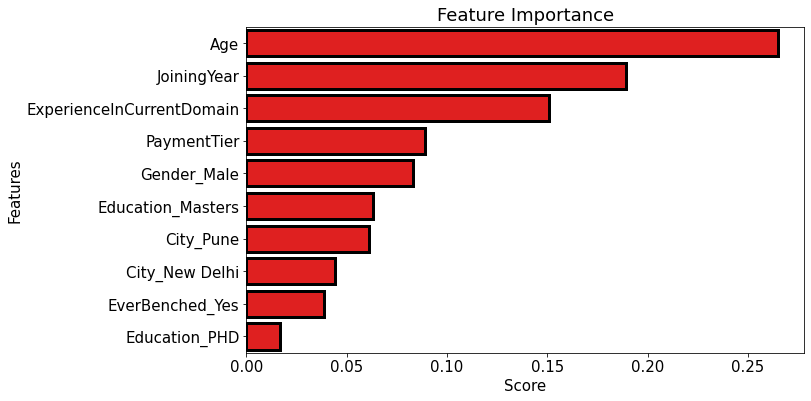

In [102]:
#colors = ["#2f5586", "#f6f5f5"]
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index,color = 'red',linewidth = 3,edgecolor = 'black')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()